In [10]:
import csv

# parse input
X = []
Y = []
with open('adult.data') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
        
    for row in data:
        if(len(row)==15):
            X.append([row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7],
                      row[8], row[9], row[10], row[11], row[12], row[13]])
            Y.append(row[14])
    
print(X[42])
print(Y[42])


['24', ' Private', ' 172987', ' Bachelors', ' 13', ' Married-civ-spouse', ' Tech-support', ' Husband', ' White', ' Male', ' 0', ' 0', ' 50', ' United-States']
 <=50K


In [11]:
# Convert list to numpy arrays
X = np.array(X)
Y = np.array(Y)

In [13]:
# Shuffle data
n_sample = len(X)

# Set a seed for the pseudo random number generator. 
# The generator will output the same sequence of
# random numbers -> Replicability
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
Y = Y[order]


In [14]:
# Preprocess input
# Convert strings to integers
import numpy as np
#from sklearn.preprocessing import LabelEncoder

# Index of non numerical attributes
nna = [1, 3, 5, 6, 7, 8, 9, 13]
# Index of numerical attributes
na = [0,2,4,10,11,12]

# Use label Encoder to encode discrete non numerical attributes
#lb = LabelEncoder()
#Xp = np.copy(X)
#for i in nna:
#    Xp[:, i] = lb.fit_transform(X[:, i])

Xp = X[:, na]
Xp = Xp.astype(int)    

# Convert Y to values 0 and 1
Yp = np.where(Y==' <=50K', 0 ,1)


In [16]:
# Limit data to 100 data points
Xp = Xp[:100, :]
Yp = Yp[:100]

print(Xp.shape)
print(Xp)
print(Yp)

(100, 6)
[[    49 110172      9      0      0     40]
 [    49 105431      9      0      0     40]
 [    31  34374     15      0      0     50]
 [    53 191025     10      0      0     43]
 [    30 108247     13      0      0     40]
 [    43 211128     14      0      0     50]
 [    27 389713     10      0      0     40]
 [    40 105717     14      0   1876     35]
 [    49 194895     13      0      0     40]
 [    23 156423     13      0      0     20]
 [    33 222654     10      0      0     66]
 [    50 154779     10      0      0     40]
 [    24 103064     13   3674      0     40]
 [    44 267717     14  15024      0     45]
 [    34 684015      3      0      0     40]
 [    41 151990     11      0      0     15]
 [    31 591711     10      0      0     40]
 [    19 208366      9      0      0     40]
 [    25 236242     15      0      0     30]
 [    45 186473      9      0      0     40]
 [    17  38611      7      0      0     23]
 [    19 176634      9      0      0     40]
 

In [18]:
# learn
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xp, Yp)

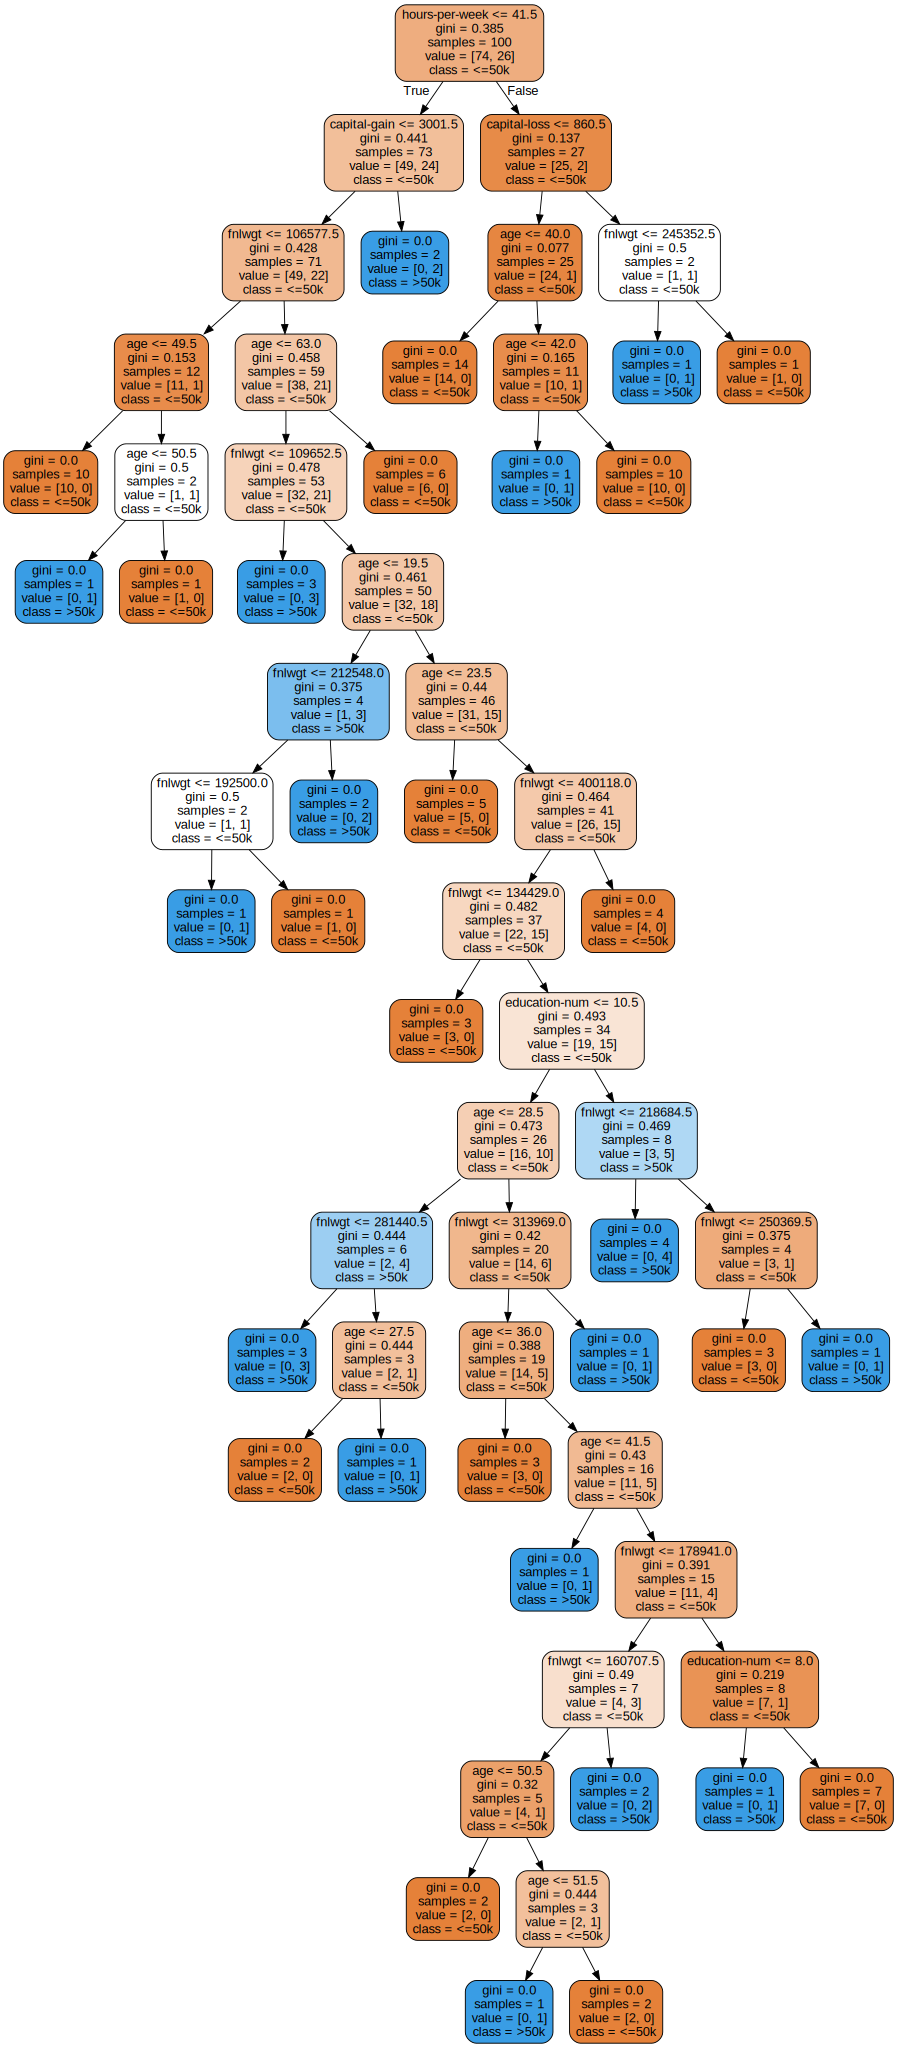

In [19]:
import graphviz

att_names = np.array(['age', 
'workclass', 
'fnlwgt', 
'education', 
'education-num', 
'marital-status', 
'occupation', 
'relationship', 
'race', 
'sex', 
'capital-gain', 
'capital-loss', 
'hours-per-week', 
'native-country'])
# Limit attribute name list to numeric attributes
att_name_p = att_names[na]

class_names = ['<=50k', '>50k']
dot_data = tree.export_graphviz(clf, out_file=None,
            feature_names = att_name_p,
            class_names = class_names,
            filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph
#graph.render("adult")